<a href="https://colab.research.google.com/github/ahcamachod/2139-geopandas-trabajando-con-datos-geoespaciales/blob/proyecto-final/Geo_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

print(gpd.__version__)

1.0.1


In [ ]:
rj = gpd.read_file('/content/RJ_Municipios_2022.shp')

In [ ]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [ ]:
rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


<Axes: >

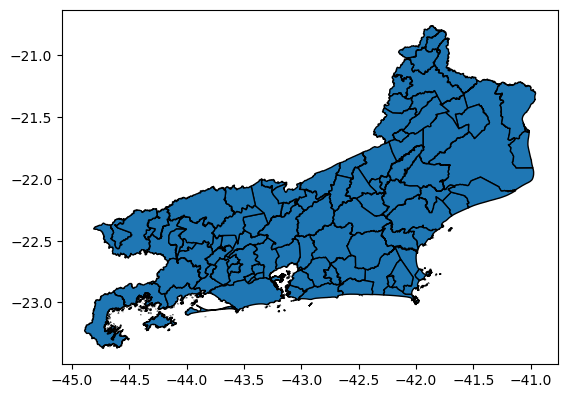

In [ ]:
rj.plot(edgecolor='black')

In [ ]:
rj.shape

(92, 5)

In [ ]:
rj.query('NM_MUN == "Rio de Janeiro"')

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.6605 ..."


<Axes: >

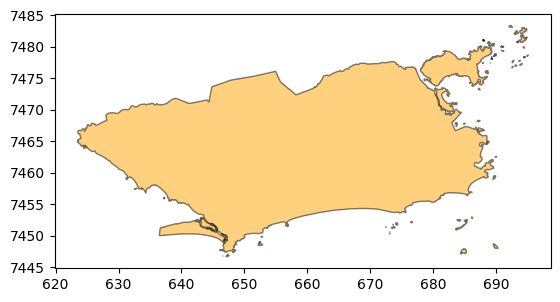

In [ ]:
rj = rj.query('NM_MUN == "Rio de Janeiro"')
rj.plot(color='orange',edgecolor='black',alpha=0.5)

In [ ]:
rj.to_file('municipio_rj.shp')

In [ ]:
import pandas as pd

inmuebles = pd.read_csv('datos.csv',sep='\t')
inmuebles.head()

,Area,Barrio,Ciudad,Direccion,Estado,Latitud,Longitud,Habitaciones,Suites,Estacionamientos,Tipo,Transaccion,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Calle Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venta,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Calle Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venta,650000
2,46,Pilares,Rio de Janeiro,Calle Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venta,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venta,430000
4,85,Gávea,Rio de Janeiro,Calle Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venta,1800000


In [ ]:
from shapely import Point

puntos_geometricos = [Point(x) for x in zip(inmuebles['Longitud'],inmuebles['Latitud'])]

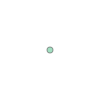

In [ ]:
puntos_geometricos[0]

In [ ]:
type(puntos_geometricos[0])

shapely.geometry.point.Point

In [ ]:
crs = {
    'proj':'latlong',
    'ellps':'WGS84',
    'datum':'WGS84',
    'no_defs':True
}

geo_datos = gpd.GeoDataFrame(inmuebles,crs=crs,geometry=puntos_geometricos)
geo_datos.head()

,Area,Barrio,Ciudad,Direccion,Estado,Latitud,Longitud,Habitaciones,Suites,Estacionamientos,Tipo,Transaccion,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Calle Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venta,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Calle Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venta,650000,POINT (-43.33691 -22.9432)
2,46,Pilares,Rio de Janeiro,Calle Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venta,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venta,430000,POINT (-43.4127 -22.98479)
4,85,Gávea,Rio de Janeiro,Calle Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venta,1800000,POINT (-51.92528 -14.235)


In [ ]:
type(geo_datos)

geopandas.geodataframe.GeoDataFrame

<ipython-input-22-8846f91a1eaa>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_datos.to_file('geo_datos.shp')
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Habitaciones' to 'Habitacion'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Estacionamientos' to 'Estacionam'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Transaccion' to 'Transaccio'
  ogr_write(


<Axes: >

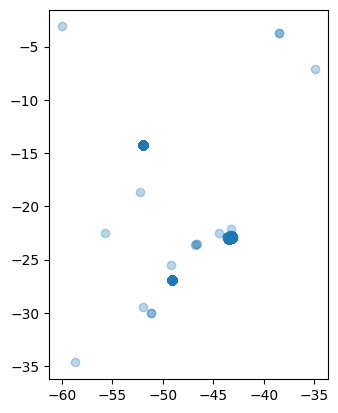

In [ ]:
geo_datos.to_file('geo_datos.shp')
geo_datos.plot(alpha=0.3)

In [ ]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
geo_datos.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Rio de Janeiro pertenece a la zona UTM 23S
# EPSG:31983
# +proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs

rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')
geo_datos = geo_datos.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')

In [ ]:
rj.crs

<Projected CRS: +proj=utm +zone=23 +south +ellps=GRS80 +units=km + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
geo_datos.crs

<Projected CRS: +proj=utm +zone=23 +south +ellps=GRS80 +units=km + ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Unknown based on GRS 1980 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

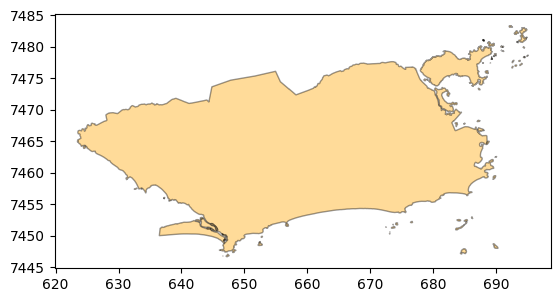

In [ ]:
base = rj.plot(color='orange',edgecolor='black',alpha=0.4)

In [ ]:
geo_datos.plot(ax=base,alpha=0.5)

<Axes: >

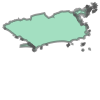

In [ ]:
rj.iloc[0].geometry

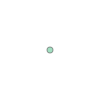

In [ ]:
geo_datos.iloc[0].geometry

In [ ]:
# Consultar si el inmueble se encuentra dentro del mapa de RJ
geo_datos.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [ ]:
geo_datos.shape

(5000, 14)

In [ ]:
geo_datos = geo_datos[geo_datos['geometry'].within(rj.iloc[0].geometry)]
geo_datos.shape

(4513, 14)

<Axes: >

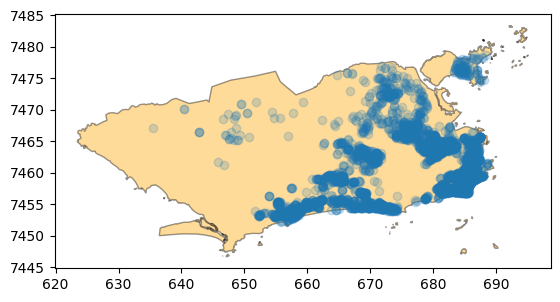

In [ ]:
base = rj.plot(color='orange',edgecolor='black',alpha=0.4)
geo_datos.plot(ax=base, alpha=0.2)

In [ ]:
metro = '/content/metro.geojson'

def leer_datos(dataset):
  df = gpd.read_file(dataset)
  df = df.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')
  df = df[df['geometry'].within(rj.iloc[0].geometry)]
  return df

In [ ]:
metro = leer_datos(metro)
metro.head()

,objectid,cod,nome,flg_atm,flg_bicicletario,flg_elevador,flg_linha1,flg_linha2,obs,flg_ativa,...,integra_trem,integra_onibus,integra_brt,corredor,integra_vlt,onibus,flg_metro_superficie,metro_superficie,data_inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.822 7476.957)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.467 7475.882)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.361 7474.958)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.008 7474.18)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.958 7472.928)


<Axes: >

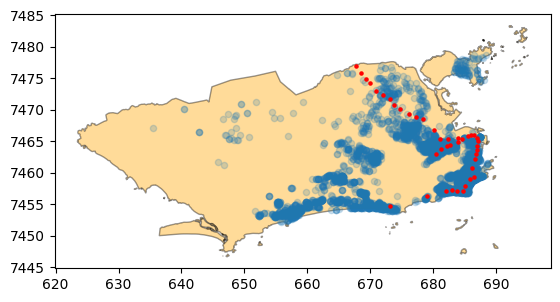

In [ ]:
base = rj.plot(color='orange',edgecolor='black',alpha=0.4)
geo_datos.plot(ax=base, alpha=0.2,markersize=20)
metro.plot(ax=base,color='red',markersize=5)

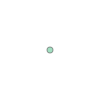

In [ ]:
geo_datos.iloc[0].geometry

In [ ]:
distancias = metro.distance(geo_datos.iloc[0].geometry)
distancias.min()

15.618532512237714

In [ ]:
geo_datos['Distancia_metro'] = geo_datos['geometry'].apply(lambda x: round(metro.distance(x).min(),2))
geo_datos.head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Area,Barrio,Ciudad,Direccion,Estado,Latitud,Longitud,Habitaciones,Suites,Estacionamientos,Tipo,Transaccion,Valor,geometry,Distancia_metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Calle Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venta,1095000,POINT (657.514 7453.832),15.62
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Calle Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venta,650000,POINT (670.524 7461.803),7.53
2,46,Pilares,Rio de Janeiro,Calle Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venta,150000,POINT (674.345 7469.44),0.73
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venta,430000,POINT (662.701 7457.284),10.71
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Calle Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venta,1160000,POINT (656.019 7453.574),17.13


In [ ]:
geo_datos.columns

Index(['Area', 'Barrio', 'Ciudad', 'Direccion', 'Estado', 'Latitud',
       'Longitud', 'Habitaciones', 'Suites', 'Estacionamientos', 'Tipo',
       'Transaccion', 'Valor', 'geometry', 'Distancia_metro'],
      dtype='object')

In [ ]:
correlacion = geo_datos[['Area','Latitud','Longitud', 'Habitaciones', 'Suites', 'Estacionamientos','Valor','Distancia_metro']].corr()

<Axes: >

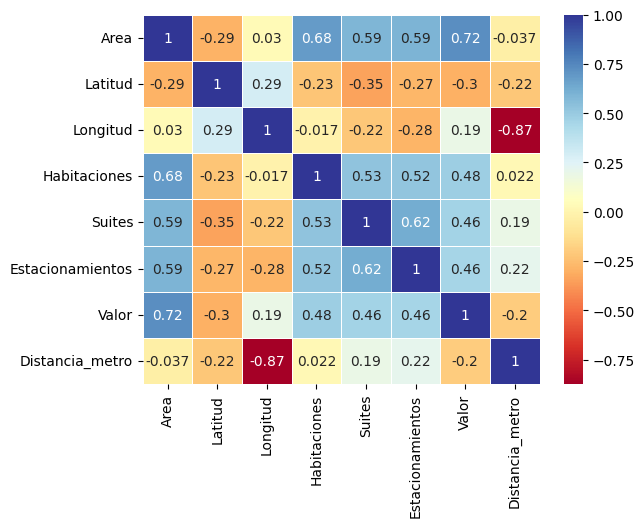

In [ ]:
import seaborn as sns

sns.heatmap(correlacion, annot=True, cmap='RdYlBu',linewidth=0.5)

In [ ]:
tren = '/content/tren.geojson'
brt = '/content/estaciones_brt.geojson'

tren = leer_datos(tren)
brt = leer_datos(brt)

display(tren.head(),brt.head())

,objectid,ramal,flg_ativa,status,data_inc,st_lengthshape,geometry
2,3,Santa Cruz,None,None,None,54788.225559,"MULTILINESTRING ((665.854 7471.62, 665.753 747..."
7,8,Deodoro,None,None,None,21880.204693,"LINESTRING (685.454 7466.02, 685.153 7465.953,..."


,fid,tipo,ano,lote_oper,corredor,nome,populacao,geometry
0,1,Terminal,2023,2,Transbrasil,Terminal Deodoro,None,MULTIPOINT (665.774 7471.769)
1,2,Estação,2024,2,Transbrasil,Guadalupe,None,MULTIPOINT (666.515 7472.717)
2,3,Estação,2024,2,Transbrasil,Jardim Guadalupe,None,MULTIPOINT (667.393 7473.291)
3,4,Estação,2024,2,Transbrasil,Fazenda Botafogo,None,MULTIPOINT (669.234 7474.239)
4,5,Estação,2024,2,Transbrasil,Ceasa-Irajá,None,MULTIPOINT (671.113 7474.957)


<Axes: >

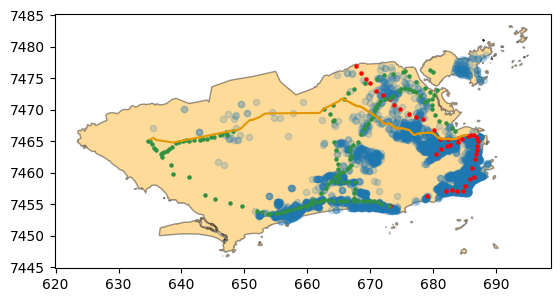

In [ ]:
base = rj.plot(color='orange',edgecolor='black',alpha=0.4)
geo_datos.plot(ax=base, alpha=0.2,markersize=20)
metro.plot(ax=base,color='red',markersize=5)
tren.plot(ax=base,color='#e39802',markersize=5)
brt.plot(ax=base,color='#309143',markersize=5)

In [ ]:
transporte = pd.concat([tren.geometry,brt.geometry],ignore_index=True)

In [ ]:
geo_datos['Distancia_transporte'] = geo_datos['geometry'].apply(lambda x: round(transporte.distance(x).min(),2))

In [ ]:
geo_datos.head()

,Area,Barrio,Ciudad,Direccion,Estado,Latitud,Longitud,Habitaciones,Suites,Estacionamientos,Tipo,Transaccion,Valor,geometry,Distancia_metro,Distancia_transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Calle Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venta,1095000,POINT (657.514 7453.832),15.62,0.45
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Calle Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venta,650000,POINT (670.524 7461.803),7.53,3.65
2,46,Pilares,Rio de Janeiro,Calle Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venta,150000,POINT (674.345 7469.44),0.73,2.00
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venta,430000,POINT (662.701 7457.284),10.71,0.42
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Calle Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venta,1160000,POINT (656.019 7453.574),17.13,0.22


<Axes: >

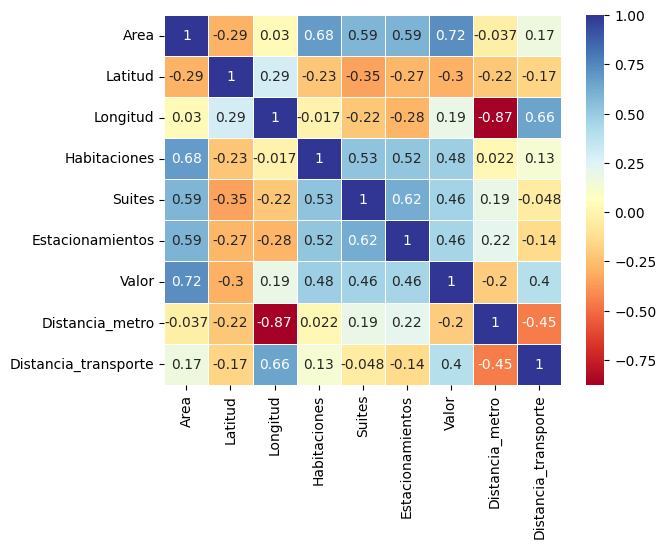

In [ ]:
correlacion = geo_datos[['Area','Latitud','Longitud', 'Habitaciones', 'Suites', 'Estacionamientos','Valor','Distancia_metro',
                         'Distancia_transporte']].corr()
sns.heatmap(correlacion, annot=True, cmap='RdYlBu',linewidth=0.5)

In [ ]:
playas = gpd.read_file('/content/naturaleza.geojson')
playas.shape

(10138, 12)

In [ ]:
playas.head()

,objectid,grupo,classe,formacoes,estagio_sucessional,sigla,ano,legenda,smac_,st_areashape,st_perimetershape,geometry
0,49465,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,8684.151722,8684.152076,431.969730,"POLYGON ((-43.56631 -23.06286, -43.56616 -23.0..."
1,49466,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,2209.349128,2209.347164,241.436675,"POLYGON ((-43.59629 -23.04797, -43.5964 -23.04..."
2,49467,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17015.388810,17015.386794,468.729476,"POLYGON ((-43.59742 -23.04846, -43.59725 -23.0..."
3,49468,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17597.587072,17597.571083,916.464380,"POLYGON ((-43.60753 -23.04328, -43.60773 -23.0..."
4,49469,Antropismo,Vegetação gramíneo-lenhosa,,,Vg,2018-06-01 00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.907080,11834.901131,605.329904,"POLYGON ((-43.5712 -23.0593, -43.57117 -23.059..."


In [ ]:
playas.classe.unique()

array(['Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral',
       'Corpos d’água costeiros'], dtype=object)

In [ ]:
playas = playas[playas['classe']=='Praia']
playas.shape

(81, 12)

<Axes: >

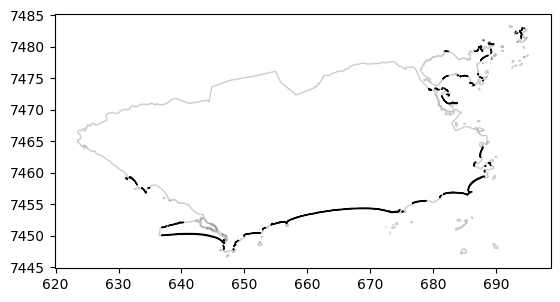

In [ ]:
playas = playas.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +units=km +no_defs +type=crs')
base = rj.plot(color='white',edgecolor='black',alpha=0.2)
playas.plot(ax=base,color='white',edgecolor='black')

In [ ]:
geo_datos['Distancia_playa'] = geo_datos['geometry'].apply(lambda x: round(playas.distance(x).min(),2))

<Axes: >

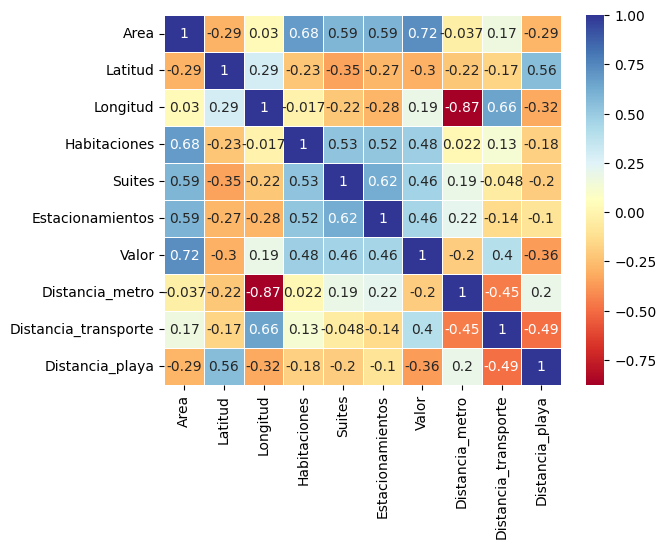

In [ ]:
correlacion = geo_datos[['Area','Latitud','Longitud', 'Habitaciones', 'Suites', 'Estacionamientos','Valor','Distancia_metro',
                         'Distancia_transporte','Distancia_playa']].corr()
sns.heatmap(correlacion, annot=True, cmap='RdYlBu',linewidth=0.5)